# 네이버 영화 감정 분석

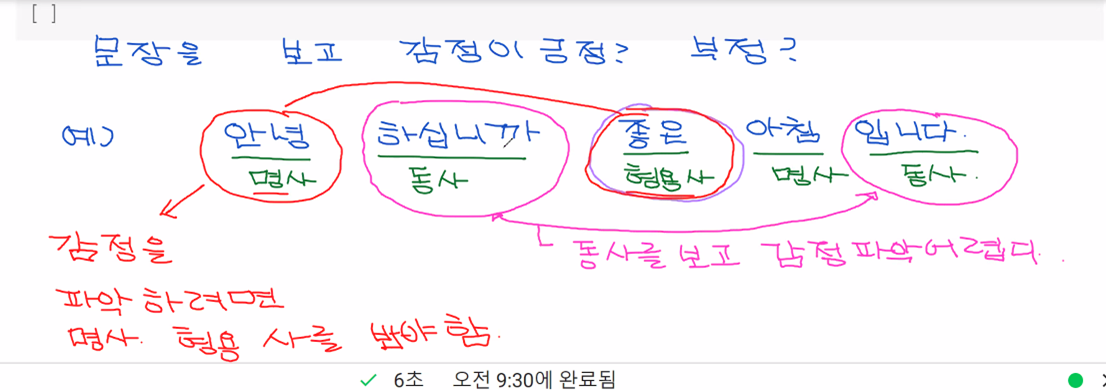

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 4.5 MB/s 
     |████████████████████████████████| 448 kB 37.7 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Twitter # 단어의 품사를 알려줌
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings(action='ignore')



In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/15주차 RNN_LSTM/datasets/ratings_train.txt'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/15주차 RNN_LSTM/datasets/ratings_test.txt'

In [ ]:
with open(
    train_path,
    encoding = "utf8") as f:
    result = [line.split("\t") for line in f.read().splitlines()]
    result = result[1:]

In [ ]:
train_tmp = result
train_tmp[1:10]

[['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1']]

In [ ]:
with open(
    test_path,
    encoding = "utf8") as f:
    result = [line.split("\t") for line in f.read().splitlines()]
    result = result[1:]

In [ ]:
test_tmp = result

In [ ]:
# 객체 생성
twitter = Twitter()

print(twitter.pos("안녕 하십니까? 좋은 아침입니다. 반가웠어요"))
print("=" * 100)

# stem = True : 동사나 , 형용사를 현재시제로 바꿈
print(twitter.pos("안녕 하십니까? 좋은 아침입니다. 반가웠어요", stem = True))
print("=" * 100)

tagged = twitter.pos("홍길동이 길을 걸었다. 아버지는 방으로 들어 갔다. 길동은 슬펐다", stem = True)
tagged

[('안녕', 'Noun'), ('하십니까', 'Verb'), ('?', 'Punctuation'), ('좋은', 'Adjective'), ('아침', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('반가웠어요', 'Adjective')]
[('안녕', 'Noun'), ('하다', 'Verb'), ('?', 'Punctuation'), ('좋다', 'Adjective'), ('아침', 'Noun'), ('이다', 'Adjective'), ('.', 'Punctuation'), ('반갑다', 'Adjective')]


[('홍길동', 'Noun'),
 ('이', 'Josa'),
 ('길', 'Noun'),
 ('을', 'Josa'),
 ('걸다', 'Verb'),
 ('.', 'Punctuation'),
 ('아버지', 'Noun'),
 ('는', 'Josa'),
 ('방', 'Noun'),
 ('으로', 'Josa'),
 ('들다', 'Verb'),
 ('가다', 'Verb'),
 ('.', 'Punctuation'),
 ('길동', 'Noun'),
 ('은', 'Josa'),
 ('슬프다', 'Adjective')]

In [ ]:
for i in range(len(tagged)):
    print("tagged[{}]={}".format(i, tagged[i]))
    print("tagged[{}][0]={}".format(i, tagged[i][0]))
    print("tagged[{}][1]={}".format(i, tagged[i][1]))
    print("="*100)

tagged[0]=('홍길동', 'Noun')
tagged[0][0]=홍길동
tagged[0][1]=Noun
tagged[1]=('이', 'Josa')
tagged[1][0]=이
tagged[1][1]=Josa
tagged[2]=('길', 'Noun')
tagged[2][0]=길
tagged[2][1]=Noun
tagged[3]=('을', 'Josa')
tagged[3][0]=을
tagged[3][1]=Josa
tagged[4]=('걸다', 'Verb')
tagged[4][0]=걸다
tagged[4][1]=Verb
tagged[5]=('.', 'Punctuation')
tagged[5][0]=.
tagged[5][1]=Punctuation
tagged[6]=('아버지', 'Noun')
tagged[6][0]=아버지
tagged[6][1]=Noun
tagged[7]=('는', 'Josa')
tagged[7][0]=는
tagged[7][1]=Josa
tagged[8]=('방', 'Noun')
tagged[8][0]=방
tagged[8][1]=Noun
tagged[9]=('으로', 'Josa')
tagged[9][0]=으로
tagged[9][1]=Josa
tagged[10]=('들다', 'Verb')
tagged[10][0]=들다
tagged[10][1]=Verb
tagged[11]=('가다', 'Verb')
tagged[11][0]=가다
tagged[11][1]=Verb
tagged[12]=('.', 'Punctuation')
tagged[12][0]=.
tagged[12][1]=Punctuation
tagged[13]=('길동', 'Noun')
tagged[13][0]=길동
tagged[13][1]=Noun
tagged[14]=('은', 'Josa')
tagged[14][0]=은
tagged[14][1]=Josa
tagged[15]=('슬프다', 'Adjective')
tagged[15][0]=슬프다
tagged[15][1]=Adjective


In [ ]:
# 명사나 형용사인 단어를 리스트에 추가
stems = []
for i in range(len(tagged)):
  if (tagged[i][1] == 'Noun') or (tagged[i][1] == "Adjective"):

    print("tagged[{}]={}".format(i, tagged[i]))
    print("tagged[{}][0]={}".format(i, tagged[i][0]))
    print("tagged[{}][1]={}".format(i, tagged[i][1]))
    stems.append(tagged[i][0])
    print("="*100)

# stems 출력
print("stmes =",stems)

tagged[0]=('홍길동', 'Noun')
tagged[0][0]=홍길동
tagged[0][1]=Noun
tagged[2]=('길', 'Noun')
tagged[2][0]=길
tagged[2][1]=Noun
tagged[6]=('아버지', 'Noun')
tagged[6][0]=아버지
tagged[6][1]=Noun
tagged[8]=('방', 'Noun')
tagged[8][0]=방
tagged[8][1]=Noun
tagged[13]=('길동', 'Noun')
tagged[13][0]=길동
tagged[13][1]=Noun
tagged[15]=('슬프다', 'Adjective')
tagged[15][0]=슬프다
tagged[15][1]=Adjective
stmes = ['홍길동', '길', '아버지', '방', '길동', '슬프다']


In [ ]:
"^^V".join(stems)

'홍길동^^V길^^V아버지^^V방^^V길동^^V슬프다'

In [ ]:
# 위 작업을 함수화
def getNounAdjective(text):
  stems = []
  tagged = twitter.pos(text, stem = True)
  for i in range(len(tagged)):
    if tagged[i][1] == 'Noun' or tagged[i][1] == "Adjective":
      stems.append(tagged[i][0])
  
  return " ".join(stems)

In [ ]:
getNounAdjective("홍길동은 슬퍼")

'홍길동 슬프다'

In [ ]:
for i in range(10):
    print("train_tmp[{}]={}".format(i, train_tmp[i]))
    print("train_tmp[{}][1]={}".format(i, train_tmp[i][1]))
    print("getNounAdjective(train_tmp[{}][1])={}".format(i, getNounAdjective(train_tmp[i][1])) )
    print("train_tmp[{}][2]={}".format(i, train_tmp[i][2]))
    print("="*100)

train_tmp[0]=['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']
train_tmp[0][1]=아 더빙.. 진짜 짜증나네요 목소리
getNounAdjective(train_tmp[0][1])=더빙 진짜 짜증나다 목소리
train_tmp[0][2]=0
train_tmp[1]=['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1']
train_tmp[1][1]=흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
getNounAdjective(train_tmp[1][1])=흠 포스터 보고 초딩 영화 줄 오버 연기 가볍다
train_tmp[1][2]=1
train_tmp[2]=['10265843', '너무재밓었다그래서보는것을추천한다', '0']
train_tmp[2][1]=너무재밓었다그래서보는것을추천한다
getNounAdjective(train_tmp[2][1])=무재 밓었 다그 래서 추천
train_tmp[2][2]=0
train_tmp[3]=['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0']
train_tmp[3][1]=교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
getNounAdjective(train_tmp[3][1])=교도소 이야기 구먼 솔직하다 재미 없다 평점 조정
train_tmp[3][2]=0
train_tmp[4]=['6483659', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '1']
train_tmp[4][1]=사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
getNounAdjective(train_tmp[4][1])=몬페 의 익살스럽다 연기 영화 스파이더맨 커스틴 던스트 이쁘다
train_tmp[4][2]=1
train_tmp[5]=['5403919', '막 걸음마 뗀 3세부터 초등학교 1학

In [ ]:
# 훈련 셋
# 품사
train_x = []

# 좋은지 나쁜지 1, 0
train_y = []

for i in tqdm(range(len(train_tmp))):
  train_x.append(getNounAdjective(train_tmp[i][1]))
  train_y.append(int(train_tmp[i][2]))

  0%|          | 0/150000 [00:00<?, ?it/s]

In [ ]:
# 테스트 셋
# 품사
test_x = []

# 좋은지 나쁜지 1, 0
test_y = []

for i in tqdm(range( len(test_tmp))):
    test_x.append( getNounAdjective(test_tmp[i][1]) )
    test_y.append( int(test_tmp[i][2] ))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
X_train, y_train = train_x, train_y
X_test, y_test = test_x, test_y

In [ ]:
# 메모리를 위해 불필요한 것 삭제
del train_x
del train_y
del test_x
del test_y

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [ ]:
# num_words : 빈도수 순위  , 1~ 999위
tokenizer = Tokenizer(num_words= 999)


tokenizer.fit_on_texts(X_train)

# 확인
tokenizer.word_index.items()

dict_items([('영화', 1), ('없다', 2), ('있다', 3), ('좋다', 4), ('정말', 5), ('재밌다', 6), ('진짜', 7), ('같다', 8), ('이', 9), ('점', 10), ('아니다', 11), ('연기', 12), ('평점', 13), ('것', 14), ('최고', 15), ('스토리', 16), ('생각', 17), ('왜', 18), ('드라마', 19), ('감동', 20), ('사람', 21), ('이렇다', 22), ('보고', 23), ('말', 24), ('아깝다', 25), ('더', 26), ('때', 27), ('내', 28), ('배우', 29), ('재미있다', 30), ('거', 31), ('감독', 32), ('재미', 33), ('내용', 34), ('그냥', 35), ('뭐', 36), ('그', 37), ('재미없다', 38), ('좀', 39), ('지루하다', 40), ('쓰레기', 41), ('시간', 42), ('수', 43), ('그렇다', 44), ('나', 45), ('작품', 46), ('사랑', 47), ('다시', 48), ('하나', 49), ('볼', 50), ('마지막', 51), ('이건', 52), ('이다', 53), ('완전', 54), ('정도', 55), ('많다', 56), ('처음', 57), ('장면', 58), ('액션', 59), ('주인공', 60), ('걸', 61), ('안되다', 62), ('최악', 63), ('지금', 64), ('돈', 65), ('이야기', 66), ('별로', 67), ('임', 68), ('느낌', 69), ('연출', 70), ('개', 71), ('끝', 72), ('명작', 73), ('듯', 74), ('좋아하다', 75), ('역시', 76), ('이해', 77), ('괜찮다', 78), ('이영화', 79), ('안', 80), ('또', 81), ('여자', 82), ('때문', 83), ('

In [ ]:
# X_train에 있는 단어를 숫자로 바꿈(숫자는 빈도수)
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

In [ ]:
for i in range(len(X_train_token)):
  if len(X_train_token[i]) < 2:
    print("X_train_token[{}] = {}".format(i, X_train_token[i]))
    print("len(X_train_token[{}] = {}".format(i, len(X_train_token[i])))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
X_train_token[134327] = [17]
len(X_train_token[134327] = 1
X_train_token[134328] = [260]
len(X_train_token[134328] = 1
X_train_token[134331] = []
len(X_train_token[134331] = 0
X_train_token[134333] = [33]
len(X_train_token[134333] = 1
X_train_token[134334] = [236]
len(X_train_token[134334] = 1
X_train_token[134339] = [9]
len(X_train_token[134339] = 1
X_train_token[134342] = [364]
len(X_train_token[134342] = 1
X_train_token[134349] = []
len(X_train_token[134349] = 0
X_train_token[134352] = []
len(X_train_token[134352] = 0
X_train_token[134355] = [196]
len(X_train_token[134355] = 1
X_train_token[134356] = [196]
len(X_train_token[134356] = 1
X_train_token[134369] = [6]
len(X_train_token[134369] = 1
X_train_token[134372] = [181]
len(X_train_token[134372] = 1
X_train_token[134374] = [10]
len(X_train_token[134374] = 1
X_train_token[134376] = []
len(X_train_token[134376] = 0
X_train_token[134388] = []
len(X_train_token[134388] = 0
X_train_token[134422] = [1

In [ ]:
for i, token in enumerate(X_train_token[0:10]):
  print("i=",i)
  print("token=",token)
  print("=" * 100)

i= 0
token= [294, 7, 151, 441]
i= 1
token= [653, 295, 23, 409, 1, 121, 12, 452]
i= 2
token= [126]
i= 3
token= [66, 123, 33, 2, 13]
i= 4
token= [243, 12, 1, 146]
i= 5
token= [490, 662, 496, 1, 730, 25, 140]
i= 6
token= [120, 195, 203]
i= 7
token= [152, 730, 25, 208, 434, 5, 503, 388, 383, 986, 986, 19, 169, 2, 12, 21, 754]
i= 8
token= [59, 2, 33, 3, 568, 62, 1]
i= 9
token= [13, 111, 348, 50, 248, 445, 3]


In [ ]:
# 단어가 2개보다 적은것들
one_word_idx = [i for i in range(len(X_train_token)) if len(X_train_token[i])<2]

# 2개 보다 적은거 뺴고 모두
X_train_token = [token for i, token in enumerate(X_train_token) if i not in one_word_idx]

In [ ]:
for i, token in enumerate(X_train_token[0:10]):
    if i not in one_word_idx:
        print("i=",i)
        print("token=",token)
        print("="*100)

i= 0
token= [294, 7, 151, 441]
i= 1
token= [653, 295, 23, 409, 1, 121, 12, 452]
i= 3
token= [243, 12, 1, 146]
i= 4
token= [490, 662, 496, 1, 730, 25, 140]
i= 5
token= [120, 195, 203]
i= 6
token= [152, 730, 25, 208, 434, 5, 503, 388, 383, 986, 986, 19, 169, 2, 12, 21, 754]
i= 7
token= [59, 2, 33, 3, 568, 62, 1]
i= 8
token= [13, 111, 348, 50, 248, 445, 3]
i= 9
token= [196, 7]


In [ ]:
from tensorflow.keras.preprocessing import sequence
import numpy as np

In [ ]:
X_train_pad = sequence.pad_sequences(X_train_token, maxlen=40)
X_train_pad

array([[  0,   0,   0, ...,   7, 151, 441],
       [  0,   0,   0, ..., 121,  12, 452],
       [  0,   0,   0, ...,  33,   2,  13],
       ...,
       [  0,   0,   0, ...,   9,  36, 725],
       [  0,   0,   0, ...,   1, 863, 358],
       [  0,   0,   0, ...,   1,  34,   1]], dtype=int32)

In [ ]:
np.eye(1000)[X_train_pad[0]]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = 1000,
                   output_dim = 1000,
                   input_length = 40,
                   embeddings_initializer = Constant(np.eye(1000))
                   ))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 1000)          1000000   
Total params: 1,000,000
Trainable params: 1,000,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(LSTM(units = 128))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 1000)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               578048    
Total params: 1,578,048
Trainable params: 1,578,048
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 결과의 확률을 계산할 레이어 0 (부정), 1(긍정)
# 선형회귀
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 1000)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               578048    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,578,177
Trainable params: 1,578,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = [emotion for i, emotion in enumerate(y_train) if i not in one_word_idx]

In [ ]:
len(y_train)

126317

In [ ]:
y_train = np.array(y_train, dtype=np.float32)

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 1e-3),
    metrics = ['acc']
)

model.fit(X_train_pad, y_train, epochs = 30, batch_size = 5000)

Epoch 1/30
26/26 [==============================] - 20s 470ms/step - loss: 0.5373 - acc: 0.7524
Epoch 2/30
26/26 [==============================] - 12s 480ms/step - loss: 0.4057 - acc: 0.8157
Epoch 3/30
26/26 [==============================] - 12s 475ms/step - loss: 0.3957 - acc: 0.8200
Epoch 4/30
26/26 [==============================] - 12s 471ms/step - loss: 0.3925 - acc: 0.8218
Epoch 5/30
26/26 [==============================] - 12s 473ms/step - loss: 0.3888 - acc: 0.8236
Epoch 6/30
26/26 [==============================] - 12s 469ms/step - loss: 0.3836 - acc: 0.8252
Epoch 7/30
26/26 [==============================] - 12s 472ms/step - loss: 0.3783 - acc: 0.8276
Epoch 8/30
26/26 [==============================] - 12s 472ms/step - loss: 0.3723 - acc: 0.8290
Epoch 9/30
26/26 [==============================] - 12s 472ms/step - loss: 0.3679 - acc: 0.8313
Epoch 10/30
26/26 [==============================] - 12s 474ms/step - loss: 0.3638 - acc: 0.8332
Epoch 11/30
26/26 [====================

# 실습


# 네이버 영화평 감정 분석
- 119 ~ 152


In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Twitter # 단어의 품사를 알려줌
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/15주차 RNN_LSTM/datasets/ratings_train.txt'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/15주차 RNN_LSTM/datasets/ratings_test.txt'

In [ ]:
def read_data(filename):
  with open(filename, 'r', encoding = 'utf8') as f:

    # 한줄씩 나누고, 탭기준으로 나눠서 리스트에 넣음
    result = [line.split('\t') for line in f.read().splitlines()]

    # header 제외 , 각 칸의 제목
    result = result[1:] 

  return result

In [ ]:
# 로드
train_tmp = read_data(train_path)
test_tmp = read_data(test_path)

train_tmp[:5]

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1']]

In [ ]:
# 한글 품사 태깅 할 객체 생성
twitter = Twitter()

def getNounAdjective(text):
  # 빈 리스트
  stems = []

  # 품사 기본형 담음
  tagged = twitter.pos(text, stem = True)

  # 품사 형태가 명사나 형용사인것들의 단어를 리스트에 추가
  for i in range(len(tagged)):
    if (tagged[i][1] == 'Noun') or (tagged[i][1] == 'Adjective'):
      stems.append(tagged[i][0])
  return " ".join(stems)

In [ ]:
# 함수 확인
getNounAdjective("홍길동이 길을 걸어간다")

'홍길동 길'

In [ ]:
def kor_movie():
  # 리뷰 데이터 저장 리스트
  train_x = []

  # 감성(0,1) 데이터 저장 리스트
  train_y = []

  for i in tqdm(range(len(train_tmp))):
    # 리뷰
    train_x.append(getNounAdjective(train_tmp[i][1]))

    # 감성
    train_y.append(int(train_tmp[i][2]))

  test_x = []
  test_y = []

  for i in tqdm(range(len(test_tmp))):
    test_x.append(getNounAdjective(test_tmp[i][1]))

    test_y.append(int(test_tmp[i][2]))
  return (train_x, train_y), (test_x, test_y)

In [ ]:
# 함수 호출
(X_train, y_train), (X_test, y_test) = kor_movie()

  0%|          | 0/150000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
# 가장 많이 사용하는 단어 999개를 숫자로 변환
tokenizer = Tokenizer(num_words = 999)

# X_train의 데이터들의 빈도 파악
tokenizer.fit_on_texts(X_train)

# tokenizer 가 어떤 단어를 숫자로 변환 했는지 확인
tokenizer.word_index.items()

# X_train의 단어들을 숫자로 변환
X_train_token = tokenizer.texts_to_sequences(X_train)

# X_test의 단어들을 숫자로 변환
X_test_token = tokenizer.texts_to_sequences(X_test)

In [ ]:
tokenizer.word_index.items()

dict_items([('영화', 1), ('없다', 2), ('있다', 3), ('좋다', 4), ('정말', 5), ('재밌다', 6), ('진짜', 7), ('같다', 8), ('이', 9), ('점', 10), ('아니다', 11), ('연기', 12), ('평점', 13), ('것', 14), ('최고', 15), ('스토리', 16), ('생각', 17), ('왜', 18), ('드라마', 19), ('감동', 20), ('사람', 21), ('이렇다', 22), ('보고', 23), ('말', 24), ('아깝다', 25), ('더', 26), ('때', 27), ('내', 28), ('배우', 29), ('재미있다', 30), ('거', 31), ('감독', 32), ('재미', 33), ('내용', 34), ('그냥', 35), ('뭐', 36), ('그', 37), ('재미없다', 38), ('좀', 39), ('지루하다', 40), ('쓰레기', 41), ('시간', 42), ('수', 43), ('그렇다', 44), ('나', 45), ('작품', 46), ('사랑', 47), ('다시', 48), ('하나', 49), ('볼', 50), ('마지막', 51), ('이건', 52), ('이다', 53), ('완전', 54), ('정도', 55), ('많다', 56), ('처음', 57), ('장면', 58), ('액션', 59), ('주인공', 60), ('걸', 61), ('안되다', 62), ('최악', 63), ('지금', 64), ('돈', 65), ('이야기', 66), ('별로', 67), ('임', 68), ('느낌', 69), ('연출', 70), ('개', 71), ('끝', 72), ('명작', 73), ('듯', 74), ('좋아하다', 75), ('역시', 76), ('이해', 77), ('괜찮다', 78), ('이영화', 79), ('안', 80), ('또', 81), ('여자', 82), ('때문', 83), ('

In [ ]:
tokenizer.texts_to_sequences(X_train)

[[294, 7, 151, 441],
 [653, 295, 23, 409, 1, 121, 12, 452],
 [126],
 [66, 123, 33, 2, 13],
 [243, 12, 1, 146],
 [490, 662, 496, 1, 730, 25, 140],
 [120, 195, 203],
 [152, 730, 25, 208, 434, 5, 503, 388, 383, 986, 986, 19, 169, 2, 12, 21, 754],
 [59, 2, 33, 3, 568, 62, 1],
 [13, 111, 348, 50, 248, 445, 3],
 [196, 7],
 [497, 595, 414, 537],
 [575, 27, 512, 12, 649],
 [867, 4, 606, 37, 21, 14],
 [589, 7, 207, 1, 104, 209, 695, 20, 68, 16, 20],
 [961],
 [21, 883, 422, 883, 987, 35, 14],
 [824, 14, 77, 18, 314, 331, 33],
 [52, 5, 296],
 [184, 220, 725, 220, 227, 11, 61],
 [215, 868, 3, 74, 35, 1, 227, 11],
 [186],
 [38, 40, 8, 1, 135, 66, 3, 33, 3, 52, 50, 2, 67, 383, 67],
 [227, 533, 1, 11, 241, 859],
 [440, 4, 558, 40],
 [43, 2, 44, 87, 44],
 [],
 [385],
 [],
 [3, 70, 296, 10],
 [48, 103, 342, 249, 12, 5, 4, 54, 19],
 [41, 322, 42, 25],
 [6, 10, 18, 111],
 [157, 28, 53, 53],
 [9, 19, 93, 15],
 [142, 941, 729],
 [12, 401],
 [120, 290, 30],
 [295, 3, 269, 252],
 [9, 1, 18, 301],
 [538, 106,

In [ ]:
#  i번쨰 줄의 글자수가 2 미만이면 저장
one_word_idx = [i for i in range(len(X_train_token)) if len(X_train_token[i]) < 2]

# 단어수가 2미만에 해당하지 않으면 저장
X_train_token = [token for i, token in enumerate(X_train_token) if i not in one_word_idx]


y_train = [text for i, text in enumerate(y_train) if i not in one_word_idx]

In [ ]:
# 각 영화 리뷰 문장들의 길이가 다름
# 40길이로 맞추고 길이가 짧은 문자열들은 0으로 채움

X_train_pad = sequence.pad_sequences(X_train_token, maxlen =40)

X_test_pad = sequence.pad_sequences(X_test_token, maxlen =40)

In [ ]:
sequence.pad_sequences(X_train_token, maxlen =40)

array([[  0,   0,   0, ...,   7, 151, 441],
       [  0,   0,   0, ..., 121,  12, 452],
       [  0,   0,   0, ...,   0,   0, 126],
       ...,
       [  0,   0,   0, ...,   9,  36, 725],
       [  0,   0,   0, ...,   1, 863, 358],
       [  0,   0,   0, ...,   1,  34,   1]], dtype=int32)

In [ ]:
# 모델 객체 새성
model = Sequential()

model.add(Embedding(input_dim = 1000, # 인코딩 할 숫자 종류 0~999개, 즉 1000개
                    output_dim = 1000, # 인코딩 한 결과의 칸의수가 1000칸이 필요
                    input_length = 40, # 입력 데이터의 개수 리뷰 하나당 40개의 숫자
                    embeddings_initializer = Constant(np.eye(1000))))

model.add(LSTM(units = 128))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 1000)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               578048    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,578,177
Trainable params: 1,578,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일 및 훈련
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 1e-3),
              metrics = ['acc'])

# y_train 타입변환
y_train = np.array(y_train, dtype = np.float32)
y_test = np.array(y_test, dtype = np.float32)

# 학습
model.fit(X_train_pad, y_train,
          batch_size =1000,
          epochs = 30)

Epoch 1/30
127/127 [==============================] - 17s 101ms/step - loss: 0.4366 - acc: 0.7997
Epoch 2/30
127/127 [==============================] - 13s 100ms/step - loss: 0.3915 - acc: 0.8208
Epoch 3/30
127/127 [==============================] - 13s 104ms/step - loss: 0.3780 - acc: 0.8270
Epoch 4/30
127/127 [==============================] - 13s 100ms/step - loss: 0.3690 - acc: 0.8313
Epoch 5/30
127/127 [==============================] - 13s 100ms/step - loss: 0.3627 - acc: 0.8338
Epoch 6/30
127/127 [==============================] - 13s 100ms/step - loss: 0.3556 - acc: 0.8382
Epoch 7/30
127/127 [==============================] - 13s 100ms/step - loss: 0.3478 - acc: 0.8420
Epoch 8/30
127/127 [==============================] - 13s 100ms/step - loss: 0.3399 - acc: 0.8458
Epoch 9/30
127/127 [==============================] - 13s 101ms/step - loss: 0.3310 - acc: 0.8504
Epoch 10/30
127/127 [==============================] - 13s 101ms/step - loss: 0.3230 - acc: 0.8544
Epoch 11/30
127/127

In [ ]:
# 모델 평가
model.evaluate(X_test_pad, y_test)

1563/1563 [==============================] - 11s 6ms/step - loss: 0.8434 - acc: 0.7801


[0.8433747887611389, 0.7801399827003479]

In [ ]:
# 새로운 리뷰 예측
my_test_data = [
                "너무 지루 했습니다. 한 시간이 일년처럼 느껴 졌습니다",
                "옆사람의 통화 소리에 영화에 집중이 안 돼요",
                "오랜만에 본 감동적인 영화 였습니다"
]

test_data_list = []

for my_data in my_test_data:
  # 명사와 형용사만 리턴
  text = getNounAdjective(my_data)

  # 추가
  test_data_list.append(text)

# 단어를 숫자로 변환
x_test_token = tokenizer.texts_to_sequences(test_data_list)

# 문자 길이를 40으로 맞춤
x_test_pad = pad_sequences(x_test_token, maxlen =40)

In [ ]:
# 예측
predict = model.predict(x_test_pad)

# 0.5 이상 1, 0
predict_num = np.where(predict>0.5, 1,0)

# 1이면 긍정, 아니면 부정 리턴
predict_str = ['긍정' if pre ==1 else "부정" for pre in predict_num] 
predict_str

['부정', '긍정', '긍정']